In [1]:
# Compute present value of the liabilities
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import edhec_risk_kit as erk
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

erk.discout(10, 0.03)

SyntaxError: unmatched ')' (edhec_risk_kit.py, line 626)

In [ ]:
liabilities = pd.Series(data=[1, 1.5, 2, 2.5], index=[3, 3.5, 4, 4.5])
liabilities
erk.pv(liabilities, 0.03)

In [ ]:
liabilities.sum()

In [2]:
erk.funding_ratio(5, liabilities, 0.03) # underfunded vs liabilities

NameError: name 'erk' is not defined

In [3]:
def show_funding_ratio(assets, r):
    fr = erk.funding_ratio(assets, liabilities, r)
    print(f'{fr*100:.2f}%')

controls = widgets.interactive(show_funding_ratio,
                                   assets=widgets.IntSlider(min=1, max=10, step=1, value=5),
                                   r=(0, .20, .01)
)
display(controls)

NameError: name 'widgets' is not defined

# CIR Model to simulate changes in Interest Rates and Liability Hedging

$$ dr_{t}=a(b-r_{t})\,dt+\sigma {\sqrt  {r_{t}}}\,dW_{t} $$

In [5]:
def inst_to_ann(r):
    """
    Converts short rate to an annualized rate
    :param r:
    :return:
    """
    return np.expm1(r)

def ann_to_inst(r):
    """
    Convert annualized to a short rate
    :param r:
    :return:
    """
    return np.log1p(r)

def cir(n_years=10, n_scenarios=1, a=0.05, b=0.03, sigma=0.05, steps_per_year=12, r_0=None):
    """
    Implements the CIR model for interest rates
    :param n_years:
    :param n_scenarios:
    :param a:
    :param b:
    :param sigma:
    :param steps_per_year:
    :param r_0:
    :return:
    """
    if r_0 is None: r_0 = b
    r_0 = ann_to_inst(r_0) # from annualized rate to instantenous rate, doesn't make much of a differences for small r
    dt = 1/steps_per_year

    num_steps = int(n_years*steps_per_year+1)
    shock = np.random.normal(0, scale=np.sqrt(dt), size=(num_steps, n_scenarios))
    rates = np.empty_like(shock)
    rates[0] = r_0

    for step in range(1, num_steps):
        r_t = rates[step-1]
        d_r_t = a*(b-r_t)*dt + sigma*np.sqrt(r_t)*shock[step]
        rates[step] = abs(r_t + d_r_t)

    return pd.DataFrame(data=inst_to_ann(rates), index=range(num_steps))



<AxesSubplot:>

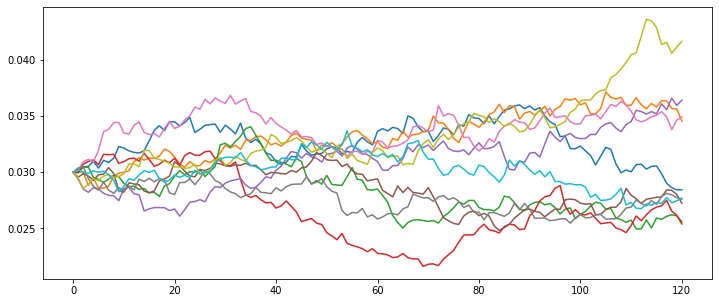

In [8]:
cir(n_scenarios=10, sigma=0.01).plot(figsize=(12, 5), legend=False)